<a href="https://colab.research.google.com/github/CHIN-HUA/hellocolab/blob/main/B0829066_HW_chap03_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ThinkDSP

This notebook contains code examples from Chapter 3: Non-periodic signals

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [ ]:
# Get thinkdsp.py
#運行並收聽chap03.ipynb中的示例，該示例位於本書的存儲庫中，也可從 http://tinyurl.com/thinkdsp03獲得。
#在洩漏示例中，嘗試用NumPy提供的其他窗口之一替換Hamming窗口，並查看它們對洩漏的影響。參見 http://docs.scipy.org/doc/numpy/reference/routines.window.html

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

### Chirp

Make a linear chirp from A3 to A5.

In [ ]:
from thinkdsp import Chirp

signal = Chirp(start=210, end=10)
wave1 = signal.make_wave(duration=2)
wave1.make_audio()

Here's what the waveform looks like near the beginning.

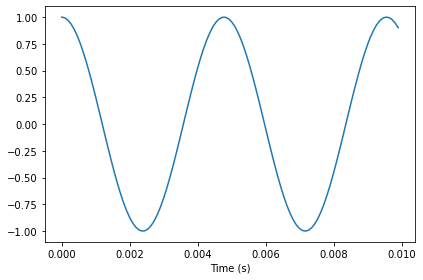

In [ ]:
wave1.segment(start=0, duration=0.01).plot()
decorate(xlabel='Time (s)')

And near the end.

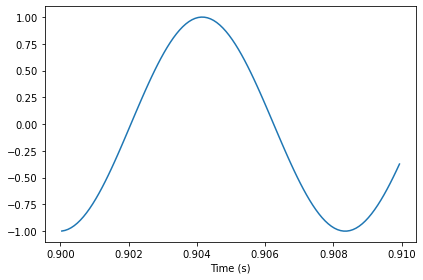

In [ ]:
wave1.segment(start=0.9, duration=0.01).plot()
decorate(xlabel='Time (s)')

#練習2   編寫一個名為SawtoothChirp的類，該類擴展Chirp 並覆蓋求值以生成頻率線性增加（或減少）的鋸齒波形。
#提示：結合使用Chirp和 SawtoothSignal的評估函數。

#畫出您認為該信號的頻譜圖的草圖，然後將其繪製出來。混疊的效果應該在視覺上顯而易見，並且如果仔細聆聽，則可以聽到。
from thinkdsp import Chirp
from thinkdsp import normalize, unbias

PI2 = 2 * np.pi

class SawtoothChirp(Chirp):
    """Represents a sawtooth signal with varying frequency."""

    def evaluate(self, ts):
        """Helper function that evaluates the signal.

        ts: float array of times
        """
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys =  normalize(unbias(frac), self.amp)
        return ys
    
    signal = SawtoothChirp(start=220, end=880)
wave = signal.make_wave(duration=1, framerate=4000)
wave.apodize()
wave.make_audio()

Here's an exponential chirp with the same frequency range and duration.

In [ ]:
#練習3   製作一個從2500 Hz掃描到3000 Hz的鋸齒chi，然後用它製作持續時間為1 s和幀頻為20 kHz的波。畫出您認為光譜將是什麼樣的草圖。然後繪製頻譜圖，看是否正確。
from thinkdsp import ExpoChirp

signal = ExpoChirp(start=2500, end=3000)
wave2 = signal.make_wave(duration=1)
wave2.make_audio()

## Leakage

Spectral leakage is when some of the energy at one frequency appears at another frequency (usually nearby).

Let's look at the effect of leakage on a sine signal (which only contains one frequency component).

In [ ]:
from thinkdsp import SinSignal

signal = SinSignal(freq=440)

If the duration is an integer multiple of the period, the beginning and end of the segment line up, and we get minimal leakage.

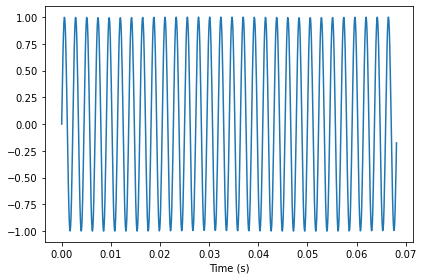

In [ ]:
duration = signal.period * 30
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time (s)')

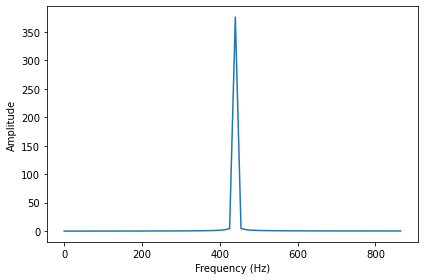

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

If the duration is not a multiple of a period, the leakage is pretty bad.

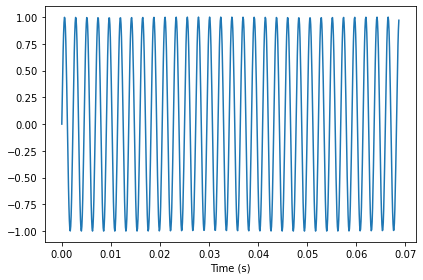

In [ ]:
duration = signal.period * 30.25
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time (s)')

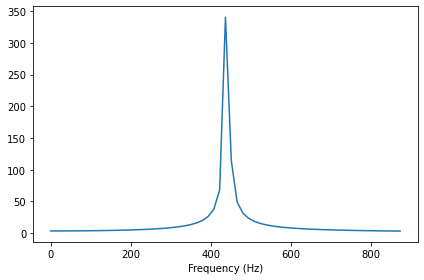

In [ ]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

Windowing helps (but notice that it reduces the total energy).

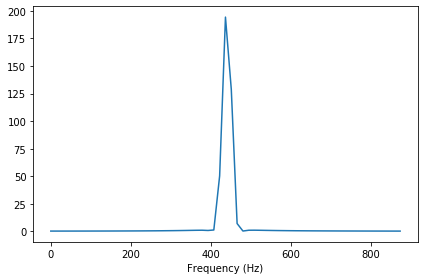

In [ ]:
wave.hamming()
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

## Spectrogram

If you blindly compute the DFT of a non-periodic segment, you get "motion blur".

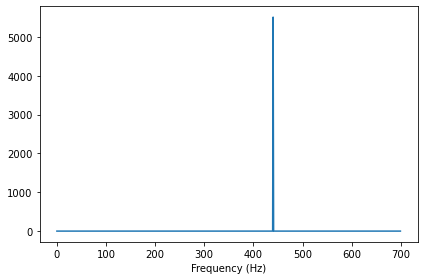

In [ ]:
#練習5   長號演奏者可以通過在連續吹奏的同時延長長號滑動來演奏滑音。隨著滑塊的延伸，管的總長度會變長，並且最終的螺距與長度成反比。
#假設播放器以恆定速度移動幻燈片，頻率如何隨時間變化？

#編寫一個名為TromboneGliss的類，該類擴展了Chirp並提供評估。進行模擬從C3到F3再到C3的長號glissando的波浪。C3為262 Hz; F3為349 Hz。signal = Chirp(start=262, end=349)
wave = signal.make_wave(duration=1)
spectrum = wave.make_spectrum()
spectrum.plot(high=700)
decorate(xlabel='Frequency (Hz)')

A spectrogram is a visualization of a short-time DFT that lets you see how the spectrum varies over time.

In [ ]:
def plot_spectrogram(wave, seg_length):
    """
    """
    spectrogram = wave.make_spectrogram(seg_length)
    print('Time resolution (s)', spectrogram.time_res)
    print('Frequency resolution (Hz)', spectrogram.freq_res)
    spectrogram.plot(high=700)
    decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')

Time resolution (s) 0.046439909297052155
Frequency resolution (Hz) 21.533203125


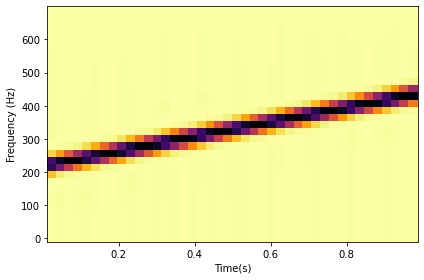

In [ ]:
signal = Chirp(start=220, end=440)
wave = signal.make_wave(duration=1, framerate=11025)
plot_spectrogram(wave, 512)

If you increase the segment length, you get better frequency resolution, worse time resolution.

Time resolution (s) 0.09287981859410431
Frequency resolution (Hz) 10.7666015625


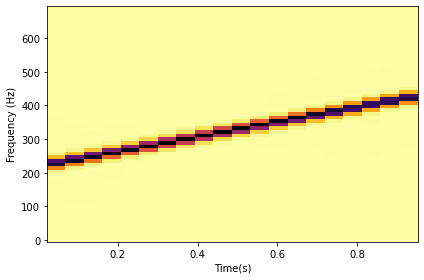

In [ ]:
plot_spectrogram(wave, 1024)

If you decrease the segment length, you get better time resolution, worse frequency resolution.

Time resolution (s) 0.023219954648526078
Frequency resolution (Hz) 43.06640625


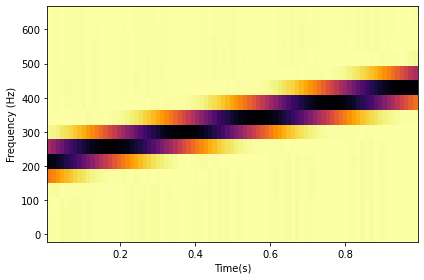

In [ ]:
plot_spectrogram(wave, 256)

In [ ]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider = widgets.IntSlider(min=128, max=4096, value=100, step=128)
interact(plot_spectrogram, wave=fixed(wave), seg_length=slider);

interactive(children=(IntSlider(value=128, description='seg_length', max=4096, min=128, step=128), Output()), …

## Spectrum of a chirp

The following interaction lets you customize the Eye of Sauron as you vary the start and end frequency of the chirp.

In [ ]:
def eye_of_sauron(start, end):
    """Plots the spectrum of a chirp.
    
    start: initial frequency
    end: final frequency
    """
    signal =  Chirp(start=start, end=end)
    wave = signal.make_wave(duration=0.5)
    spectrum = wave.make_spectrum()
    
    spectrum.plot(high=1200)
    decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [ ]:
slider1 = widgets.FloatSlider(min=100, max=1000, value=100, step=50)
slider2 = widgets.FloatSlider(min=100, max=1000, value=200, step=50)
interact(eye_of_sauron, start=slider1, end=slider2);

interactive(children=(FloatSlider(value=100.0, description='start', max=1000.0, min=100.0, step=50.0), FloatSl…